In [51]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import patches as patches
from sklearn.preprocessing import MinMaxScaler

In [52]:
class data_cluster:
    def __init__(self,document,color):
        self.document = document
        self.color = color
        
    def load_txt_array(self):
        data = np.loadtxt(self.document, delimiter=" ")
        #Select z np.array data 0 index => x 
        arr_x = np.array([])
        for i in range(0,data.shape[0]):
            x = float(np.take(data[i],0))
            arr_x = np.append(arr_x,[x],axis = 0)
        #Select z np.array data 1 index => z 
        arr_y = np.array([])
        for i in range(0,data.shape[0]):
            x = float(np.take(data[i],1))
            arr_y = np.append(arr_y,[x],axis = 0)
        stack = np.stack((arr_x,arr_y))
        return stack
     
    def graph(self):
        array = self.load_txt_array()
        x = array[0]
        y = array[1]
        plt.grid()
        graph = plt.plot(x,y,'bo',c=self.color)
        return graph
    
    def cluster_img(self):
        #create cluster_img for dataset
        data = np.loadtxt(self.document, delimiter=" ")
        img = plt.imshow(data, interpolation='none', aspect='auto')
        doc = self.document
        plt.title("Claster for dataset "+doc)
        return img
    
    def get_x_values(self):
        array = self.load_txt_array()
        x = array[0]
        return x
    
    def get_y_values(self):
        array = self.load_txt_array()
        y = array[1]
        return y    
    
    def get_document(self):
        get_doc = self.document
        return get_doc

In [53]:
def show_graphs():
    plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=None, hspace=None)
    plt.subplot(2, 2, 1)
    cluster1.graph()
    plt.title('2D Visualisation of datasets ')
    plt.ylabel('Dataset1')

    plt.subplot(2, 2, 2)
    cluster2.graph()
    plt.ylabel('Dataset 2')

def show_clusters():
    plt.subplots_adjust( right=2, top=2)
    plt.subplot(2,2,1)
    cluster1.cluster_img()
    plt.xlabel('Cluster for Dataset 1')
    plt.subplot(2,2,2)
    cluster2.cluster_img()
    plt.xlabel('Cluster for Dataset 2')

def merge_graph():
    x1 = cluster1.get_x_values()
    x2 = cluster2.get_x_values()
    y1 = cluster1.get_y_values()
    y2 = cluster2.get_y_values()
    x = np.concatenate((x1, x2), axis=None)
    y = np.concatenate((y1, y2), axis=None)
    plt.scatter(x1, y1, c='green')
    plt.scatter(x2, y2, c='lightblue')
    graph = plt.show()
    return graph

def merge_dataset():
    d1 = np.loadtxt(cluster1.get_document(), delimiter=" ")
    d2 = np.loadtxt(cluster2.get_document(), delimiter=" ")
    merge_data = np.concatenate((d1,d2))
    return merge_data

def merge_cluster_img():
    merge_data = merge_dataset()
    img_plt = plt.imshow(merge_data, interpolation='none', aspect='auto')
    return img_plt

In [54]:
class Kohonen:
    def __init__(self,):
        self.som_width = 8
        self.som_length = 8
        self.epochs = 10000
        self.initial_learning_rate = 0.01
        self.rows = df_scaled.shape[0]
        self.cols = df_scaled.shape[1]
        self.initial_radius = max(self.som_width, self.som_length)/2
        self.time_constant =  self.epochs/np.log(self.initial_radius)
        self.som_net = som_net = np.random.random((self.som_width, self.som_length, self.cols))
        
    def som_net_func(self):
        print("Initial weights set to SOM network:")
        return self.som_net
    
    def update_radius(self,initial_radius, i, time_constant):
        return self.initial_radius * np.exp(-i / self.time_constant)
        
    def update_learning_rate(self,initial_learning_rate, i, n_iterations):
        return self.initial_learning_rate * np.exp(-i / n_iterations)    
    
    def calculate_euclidian_dis(self,point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    def find_best_matching_Unit(self,data_point):
        bmu_pos = np.array([0, 0])
        min_dist = np.iinfo(np.int).max
        input_dim = len(data_point)
    
        for x in range(self.som_width):
            for y in range(self.som_length):
                som_weight_vector = self.som_net[x, y, :].reshape(1, 4)
                euclidian_dist = self.calculate_euclidian_dis(som_weight_vector, data_point)
                if euclidian_dist < min_dist:
                    min_dist = euclidian_dist
                    bmu_pos = np.array([x, y])
    
        bmu = self.som_net[bmu_pos[0], bmu_pos[1], :].reshape(1, 4)
        return (bmu, bmu_pos)
    
    def neighbourhood_function(self, bmu_location, selected_node_location, radius):
        euclidien_dist_to_bmu = self.calculate_euclidian_dis(bmu_location, selected_node_location)
        return np.exp(-euclidien_dist_to_bmu / (2* (radius**2)))
    
    def body(self):
        #df_scaled = df_scaled.sample(frac=1)
        rad_values = list()
        learn_rates_values = list()
        rad_values.append(self.initial_radius)
        learn_rates_values.append(self.initial_learning_rate)
        
        for i in range(self.epochs):
            data_point = np.array(df_scaled.sample())
            bmu, bmu_idx = self.find_best_matching_Unit(data_point)
            
            r_new = self.update_radius(self.initial_radius, i, self.time_constant)
            new_learning_rate = self.update_learning_rate(self.initial_learning_rate, i, self.epochs)
            
            rad_values.append(r_new)
            learn_rates_values.append(new_learning_rate)
            
            for x in range(self.som_width):
                for y in range(self.som_length):
                    w = self.som_net[x, y, :].reshape(1, 4)
                    w_dist = self.calculate_euclidian_dis(np.array([x, y]), bmu_idx)
                    
                    if w_dist <= r_new:
                        influence = self.neighbourhood_function(bmu, w, r_new)
                        new_w = w + (new_learning_rate * influence * (data_point - w))
                        self.som_net[x, y, :] = new_w.reshape(1, 4)
                        
        plt.plot(rad_values)
        plt.title('Radius values')
        plt.show()
        print(rad_values[25])
        
        plt.plot(learn_rates_values)
        plt.title('Learning Rates values')
        print(learn_rates_values[25])
        plt.show()
        
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(1,1,1, aspect='equal')
        ax.set_xlim((0, self.som_width+1))
        ax.set_ylim((0, self.som_length+1))
        ax.set_title('Self-Organising Map after %d iterations' % self.epochs)

        for x in range(1, self.som_width + 1):
            for y in range(1, self.som_length + 1):
                ax.add_patch(patches.Circle((x, y), 0.5, facecolor=self.som_net[x-1,y-1,:], edgecolor='black'))
        plt.show()

        fig.savefig('SOM_dataset.png')
        
        u_matrix = np.zeros((self.som_width-1, self.som_length-1))
        
        for x in range(1, self.som_width):
            for y in range(1, self.som_length):
                neighbour_list = list()
                print("-"* 100)
                print("neighbour cordinates of x=%d, y=%d" %(x,y))
                for u in range(x-1, x+2):
                    if (u < 0 or u > (self.som_width-1)):
                        continue
                    for v in range(y-1, y+2):
                        if(v < 0 or v > (self.som_length-1)):
                            continue
                        if (u == x and v == y):
                            continue
                        neighbour_list.append(np.array([u,v]))
                        #print(u,v)
                
                sum=0
                for idx in neighbour_list:
                    sum += self.calculate_euclidian_dis(self.som_net[x,y,:], self.som_net[idx[0],idx[1],:])
                
                
                avg = sum/len(neighbour_list)
                print("Sum of distance to neighbour weights=%f, average=%f" % (sum, avg))     
                u_matrix[x-1,y-1] = avg 
                
        fig = plt.figure(figsize=(7,7))
        plt.title("U Matrix visualization of data set using SOM")
        plt.imshow(u_matrix, cmap="gray")
        plt.show()
        fig.savefig('U_Matrix_final.png')
        fig = plt.figure(figsize=(7,7))
        plt.title("U Matrix visualization of data set using SOM")
        plt.imshow(u_matrix, cmap="viridis")
        plt.show()
        fig.savefig('U_Matrix_final_colorfull.png')

In [55]:
cluster1 = data_cluster("acc1.txt","green")
cluster2 = data_cluster("acc2.txt","blue")

In [56]:
df = pd.DataFrame(merge_dataset())
df.to_csv('dataset.txt', index=False)
df = df.iloc[:,:-1]
#df.dtypes

In [57]:
feature_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = feature_scaler.fit_transform(df)
df_scaled = pd.DataFrame(data=df_scaled)

In [58]:
np.random.seed(10)
rows,cols = df_scaled.shape
print("Data set, row count=%d column count=%d" %(rows, cols))

Data set raw count=216 column count=4


In [60]:
model = Kohonen()

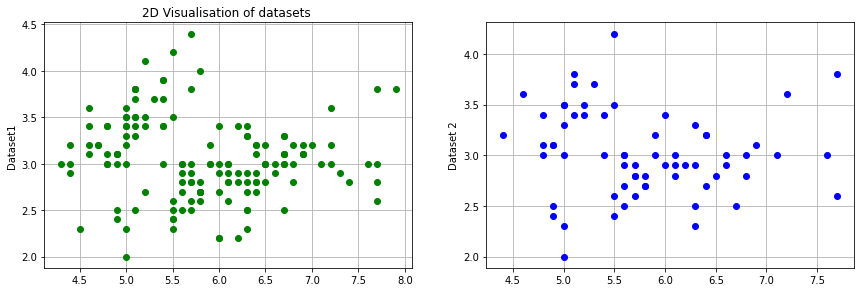

In [61]:
show_graphs()

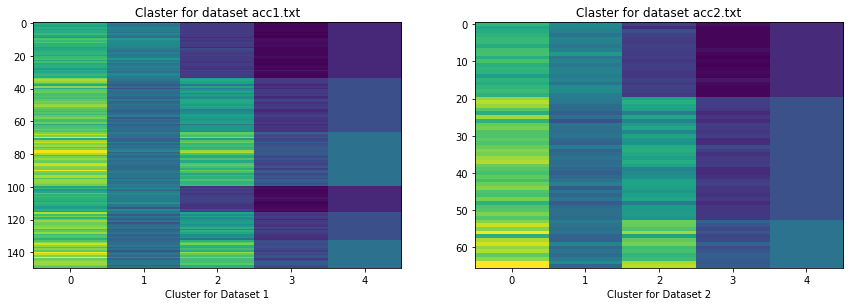

In [62]:
show_clusters()

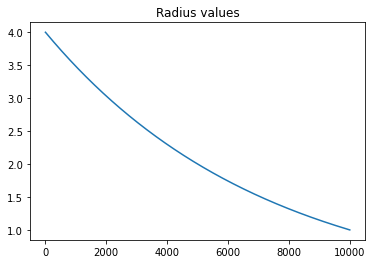

3.986713688875298
0.009976028776973818


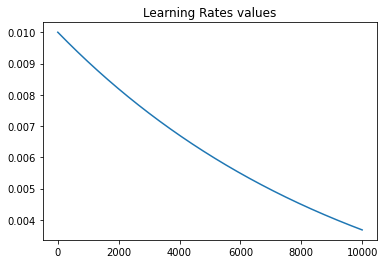

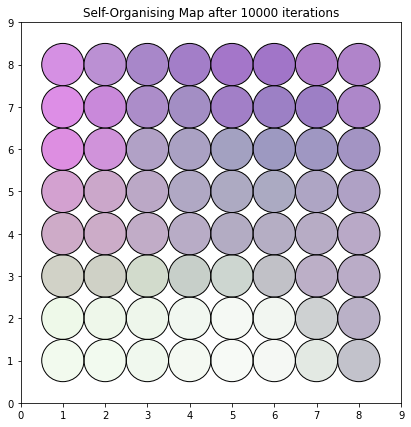

----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=1
Sum of distance to neighbour weights=1.763587, average=0.220448
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=2
Sum of distance to neighbour weights=2.730428, average=0.341304
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=3
Sum of distance to neighbour weights=1.575436, average=0.196929
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=4
Sum of distance to neighbour weights=1.135945, average=0.141993
----------------------------------------------------------------------------------------------------
neighbour cordinates of x=1, y=5
Sum of distance to neighbour weights=1.523279, average=0.190410
----------

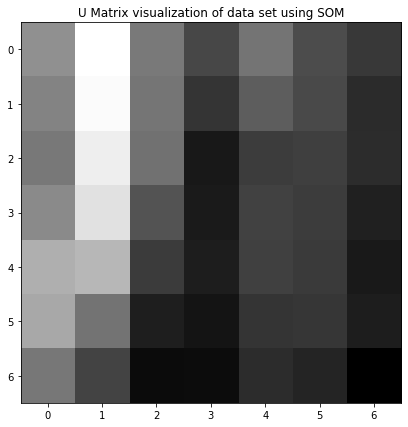

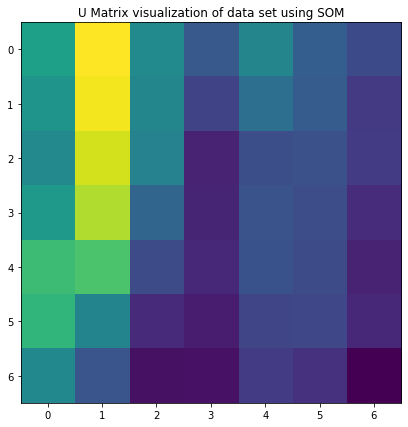

In [63]:
model.body()